## Creation of training signals with real lookup table
With **training signals** we mean the ground signals used to create the "training" dataset of parameters with optimization method.
The dataset will be composed by the current [A] and the different ambient temperatures.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_temps = pd.read_csv("../../data/external/t_amb_signals.csv")

In [3]:
df_temps

0.0       2.5       5.0       7.5       10.0       12.5  \
0      -0.093094  2.601082  5.077663  7.484869   9.991991  12.506992   
1       0.086210  2.481719  5.017877  7.363470  10.033503  12.376604   
2      -0.006133  2.720178  5.061267  7.547765   9.986387  12.407664   
3       0.037719  2.652582  5.149189  7.543731  10.110686  12.314581   
4       0.042095  2.469640  5.077677  7.459864   9.978020  12.429081   
...          ...       ...       ...       ...        ...        ...   
999995  0.049043  2.457302  5.180797  7.545623  10.037549  12.416348   
999996  0.195750  2.573786  5.141525  7.487013   9.954926  12.487057   
999997  0.033667  2.513225  4.871306  7.477331   9.949170  12.541576   
999998 -0.003696  2.271460  5.034255  7.537996  10.090668  12.544645   
999999 -0.091600  2.674550  5.167998  7.282843   9.910460  12.346712   

             15.0       17.5       20.0       22.5       25.0       27.5  \
0       15.135391  17.323824  19.982368  22.301598  25.089263  27.387470   
1       15.041521  17.537729  20.107128  22.475118  25.020438  27.515973   
2       15.038964  17.569636  20.109053  22.408641  25.163706  27.585929   
3       14.907450  17.422431  19.854628  22.506452  24.915710  27.598823   
4       15.111528  17.578527  19.996955  22.267712  25.120071  27.504037   
...           ...        ...        ...        ...        ...        ...   
999995  14.947794  17.464177  19.887575  22.404219  24.830179  27.348792   
999996  14.841335  17.500196  20.081257  22.553895  24.947756  27.504555   
999997  14.986912  17.521905  20.038808  22.660673  25.106444  27.562306   
999998  14.915837  17.594300  19.927041  22.608010  25.307264  27.527966   
999999  15.146093  17.555339  19.991187  22.457992  24.930543  27.605612   

             30.0       32.5       35.0       37.5       40.0  
0       29.981303  32.484522  35.144641  37.338868  40.005104  
1       29.973052  32.427116  35.044955  37.473071  39.970402  
2       29.839896  32.346360  35.133284  37.501313  40.070148  
3       30.063214  32.301106  34.887764  37.477044  39.982055  
4       30.121500  32.770312  35.112273  37.401680  40.195194  
...           ...        ...        ...        ...        ...  
999995  30.016684  32.583204  35.014269  37.430506  39.978505  
999996  29.955591  32.307227  34.892139  37.554640  40.072512  
999997  29.874681  32.452880  34.899588  37.581769  39.957569  
999998  30.019198  32.418015  35.010046  37.586490  39.979297  
999999  29.990185  32.605412  35.067976  37.503941  39.947084  

[1000000 rows x 17 columns]

In [4]:
df_current = pd.read_csv("../../data/ground/ol_ground_single_cycle_cell.csv")

In [5]:
df_current

Voltage [V]  Current [A]                 Time  Tdiff [s]  T_amb [degC]
0         3.914571       6.0750  2024-06-06 14:05:45      1.000        24.911
1         3.913429       6.0750  2024-06-06 14:05:46      1.000        24.911
2         3.912857       5.8880  2024-06-06 14:05:47      1.003        24.942
3         3.912000       5.9680  2024-06-06 14:05:48      1.084        24.911
4         3.911571       5.9150  2024-06-06 14:05:49      1.001        24.911
...            ...          ...                  ...        ...           ...
16238     3.985571     -10.8015  2024-06-06 18:41:39      0.999        26.031
16239     3.985714     -10.8280  2024-06-06 18:41:40      1.007        26.031
16240     3.985857     -10.7750  2024-06-06 18:41:41      1.022        26.031
16241     3.986000     -10.9085  2024-06-06 18:41:42      1.053        26.000
16242     3.986286     -10.8015  2024-06-06 18:41:43      0.999        26.000

[16243 rows x 5 columns]

<Axes: >

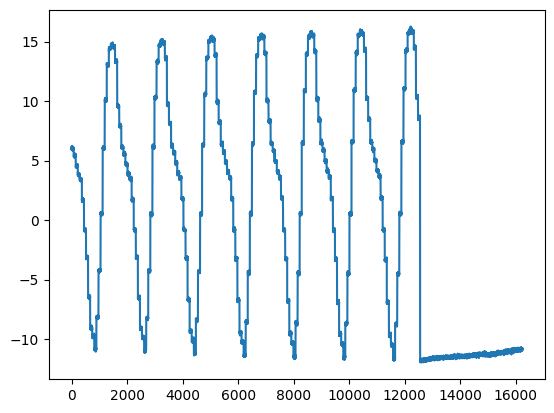

In [6]:
df_current['Current [A]'].plot()

In [7]:
current_signal = []
_ = [current_signal.extend(list(df_current['Current [A]'])) for i in range(63)]

In [8]:
times = []
_ = [times.extend(list(df_current['Tdiff [s]'])) for i in range(63)]

In [9]:
time = np.cumsum([t for t in times]) - 1

In [37]:
df_temps['Current [A]'] = current_signal[:1000000]
df_temps['Time [s]'] = time[:1000000]

In [38]:
df_temps

0.0       2.5       5.0       7.5       10.0       12.5  \
0      -0.093094  2.601082  5.077663  7.484869   9.991991  12.506992   
1       0.086210  2.481719  5.017877  7.363470  10.033503  12.376604   
2      -0.006133  2.720178  5.061267  7.547765   9.986387  12.407664   
3       0.037719  2.652582  5.149189  7.543731  10.110686  12.314581   
4       0.042095  2.469640  5.077677  7.459864   9.978020  12.429081   
...          ...       ...       ...       ...        ...        ...   
999995  0.049043  2.457302  5.180797  7.545623  10.037549  12.416348   
999996  0.195750  2.573786  5.141525  7.487013   9.954926  12.487057   
999997  0.033667  2.513225  4.871306  7.477331   9.949170  12.541576   
999998 -0.003696  2.271460  5.034255  7.537996  10.090668  12.544645   
999999 -0.091600  2.674550  5.167998  7.282843   9.910460  12.346712   

             15.0       17.5       20.0       22.5       25.0       27.5  \
0       15.135391  17.323824  19.982368  22.301598  25.089263  27.387470   
1       15.041521  17.537729  20.107128  22.475118  25.020438  27.515973   
2       15.038964  17.569636  20.109053  22.408641  25.163706  27.585929   
3       14.907450  17.422431  19.854628  22.506452  24.915710  27.598823   
4       15.111528  17.578527  19.996955  22.267712  25.120071  27.504037   
...           ...        ...        ...        ...        ...        ...   
999995  14.947794  17.464177  19.887575  22.404219  24.830179  27.348792   
999996  14.841335  17.500196  20.081257  22.553895  24.947756  27.504555   
999997  14.986912  17.521905  20.038808  22.660673  25.106444  27.562306   
999998  14.915837  17.594300  19.927041  22.608010  25.307264  27.527966   
999999  15.146093  17.555339  19.991187  22.457992  24.930543  27.605612   

             30.0       32.5       35.0       37.5       40.0  Current [A]  \
0       29.981303  32.484522  35.144641  37.338868  40.005104       6.0750   
1       29.973052  32.427116  35.044955  37.473071  39.970402       6.0750   
2       29.839896  32.346360  35.133284  37.501313  40.070148       5.8880   
3       30.063214  32.301106  34.887764  37.477044  39.982055       5.9680   
4       30.121500  32.770312  35.112273  37.401680  40.195194       5.9150   
...           ...        ...        ...        ...        ...          ...   
999995  30.016684  32.583204  35.014269  37.430506  39.978505       4.9535   
999996  29.955591  32.307227  34.892139  37.554640  40.072512       5.0335   
999997  29.874681  32.452880  34.899588  37.581769  39.957569       4.8465   
999998  30.019198  32.418015  35.010046  37.586490  39.979297       4.9270   
999999  29.990185  32.605412  35.067976  37.503941  39.947084       4.9000   

            Time [s]  
0       0.000000e+00  
1       1.000000e+00  
2       2.003000e+00  
3       3.087000e+00  
4       4.088000e+00  
...              ...  
999995  1.019315e+06  
999996  1.019316e+06  
999997  1.019317e+06  
999998  1.019318e+06  
999999  1.019319e+06  

[1000000 rows x 19 columns]

In [39]:
#df_temps.to_csv('input_signals_for_ground.csv', index=False)

---

## Analysis of generated ground signals from training ones

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [2]:
folder = "../../data/output/driven/ground_t_ambs/"

In [3]:
dirs = os.listdir(folder)

In [4]:
dfs = []
dfs_ground = []

In [5]:
for d in dirs:
    path = folder + d + '/' + (os.listdir(folder + d))[0] + '/'

    # Union of ground dataframes
    grounds = [f for f in os.listdir(path) if f.startswith('ground')]
    grounds = sorted(grounds)
    df_ground = pd.concat((pd.read_csv(path + f) for f in sorted(grounds)), ignore_index=True)
    dfs_ground.append(df_ground)

    # Union of simulation dataframes
    sim_datasets = [f for f in os.listdir(path) if f.startswith('dataset')]
    sim_datasets = sorted(sim_datasets)
    df_sim = pd.concat((pd.read_csv(path + f) for f in sorted(sim_datasets)), ignore_index=True)
    dfs.append(df_sim)

In [39]:
comparison_params = {
    'dfs': [], 
    'variables': ['r0', 'r1', 'c', 'soc', 'temperature'], 
    'x_axes': ['time'] * 5,
    'labels': [],
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[Ohm]', '[Ohm]', '[F]', '[%]', '[K]'],
    'markers': ['o'] * 17,
    'line_styles': ['-'] * 17,
    'title': 'Current',
    'save_fig': False,
    'sampling_rate': 1000,
    'colors': [],
    'plot_type': 'line',
    'dest': '', 
    'fig_name': '20C',
    'pic_format': 'png',
    'figsize': (18, 6),
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'legend_loc': 'upper center',
    'legend_bbox': (0.5, 1.3),
    'legend_ncol': 8
}

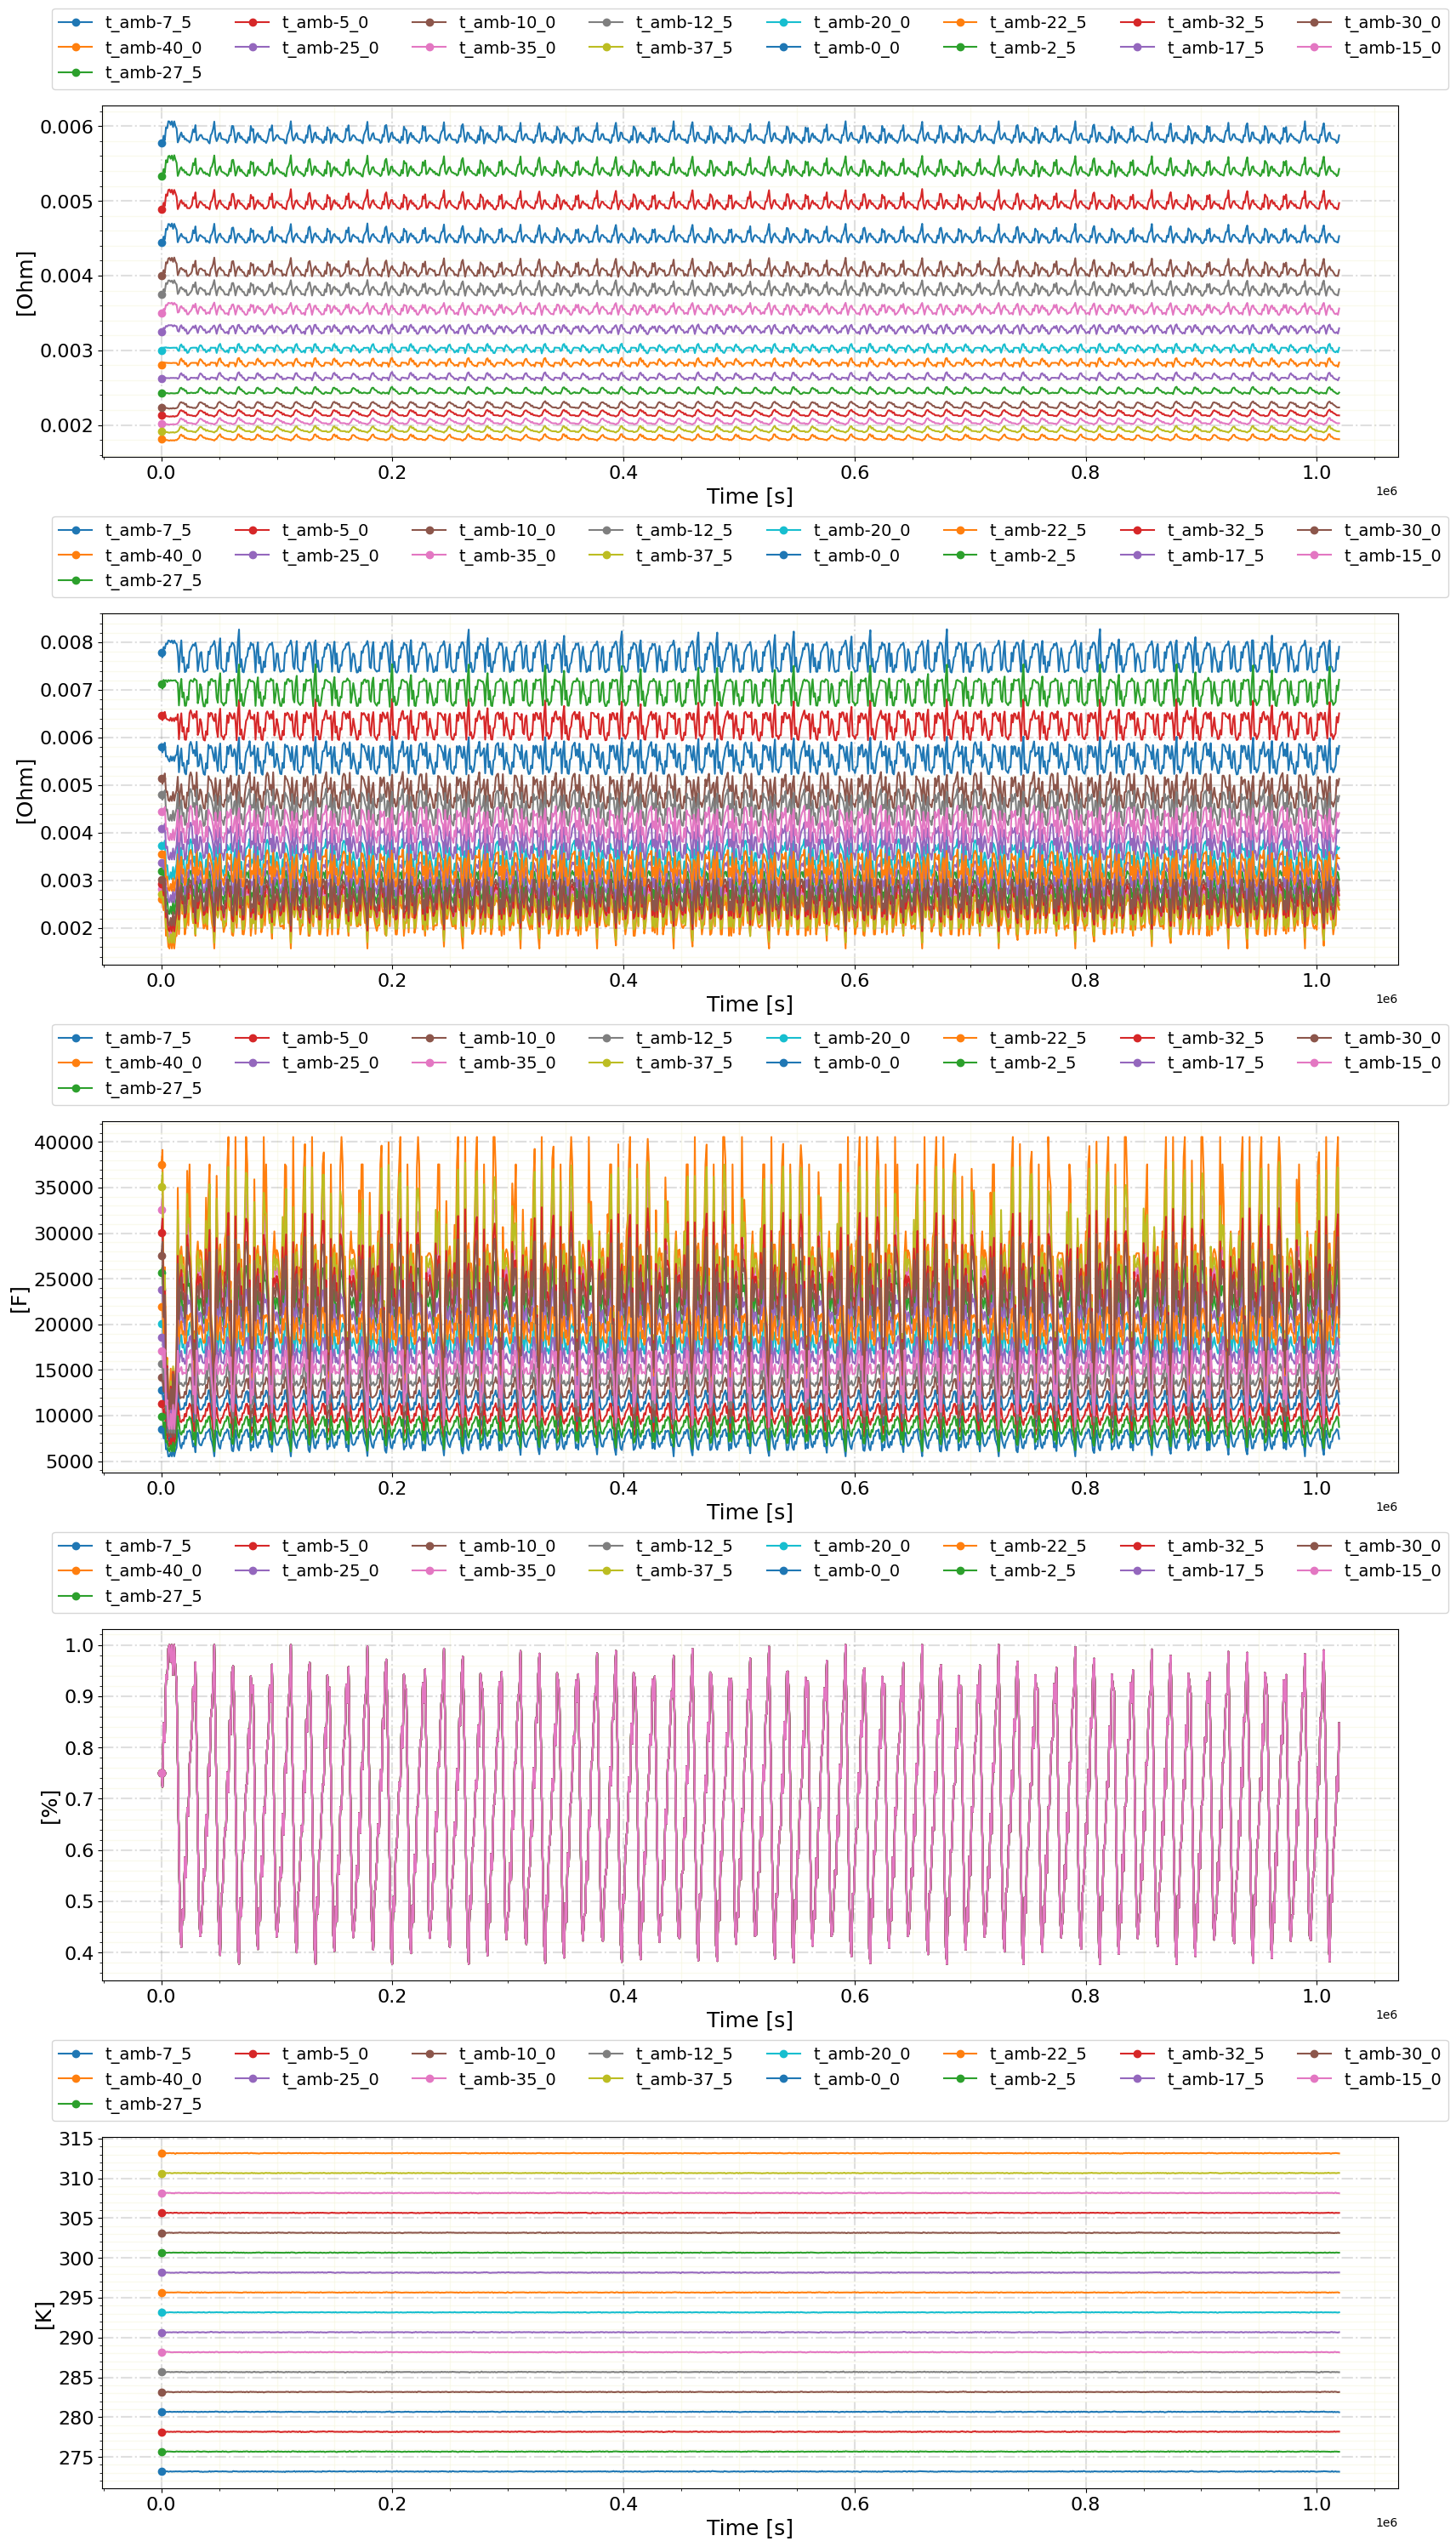

In [40]:
comparison_params['dfs'] = dfs
comparison_params['labels'] = dirs
ernesto_plotter(**comparison_params)

In [ ]:
dfs[1]['t_amb'].plot()

---

## Creation of training signal with trivial lookup table
The trivial lookup table has a constant dependency on SoC and temperature. Moreover, here we create the signals with current which allows to maintain SoC in a predefined range [0,0.5] and [0.5,1].

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import signal

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [66]:
df_current = pd.read_csv("../../data/ground/ol_ground_single_cycle_cell.csv")

In [67]:
df_current

Voltage [V]  Current [A]                 Time  Tdiff [s]  T_amb [degC]
0         3.914571       6.0750  2024-06-06 14:05:45      1.000        24.911
1         3.913429       6.0750  2024-06-06 14:05:46      1.000        24.911
2         3.912857       5.8880  2024-06-06 14:05:47      1.003        24.942
3         3.912000       5.9680  2024-06-06 14:05:48      1.084        24.911
4         3.911571       5.9150  2024-06-06 14:05:49      1.001        24.911
...            ...          ...                  ...        ...           ...
16238     3.985571     -10.8015  2024-06-06 18:41:39      0.999        26.031
16239     3.985714     -10.8280  2024-06-06 18:41:40      1.007        26.031
16240     3.985857     -10.7750  2024-06-06 18:41:41      1.022        26.031
16241     3.986000     -10.9085  2024-06-06 18:41:42      1.053        26.000
16242     3.986286     -10.8015  2024-06-06 18:41:43      0.999        26.000

[16243 rows x 5 columns]

<Axes: >

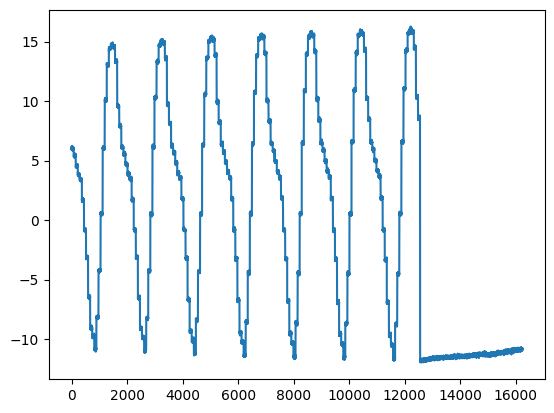

In [68]:
df_current['Current [A]'].plot()

In [5]:
soc_max = (max(df_current['Voltage [V]']) -3)/1.15
soc_min = (min(df_current['Voltage [V]'])-3)/1.15
print("SoC range: [{}, {}]".format(soc_min, soc_max))

SoC range: [0.43204968944099387, 0.8735403726708074]


In [6]:
folder = "../../data/output/driven/range_soc_per_ampiezza_corrente/"

In [7]:
dirs = os.listdir(folder)

In [8]:
dfs = []
dfs_ground = []

In [10]:
for d in dirs:
    path = folder + d + '/' + (os.listdir(folder + d))[0] + '/'

    # Union of simulation dataframes
    sim_datasets = [f for f in os.listdir(path) if f.startswith('dataset')]
    sim_datasets = sorted(sim_datasets)
    df_sim = pd.concat((pd.read_csv(path + f) for f in sorted(sim_datasets)), ignore_index=True)
    dfs.append(df_sim)

In [11]:
comparison_params = {
    'dfs': [], 
    'variables': ['r0', 'r1', 'c', 'soc'], 
    'x_axes': ['time'] * 5,
    'labels': [],
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[Ohm]', '[Ohm]', '[F]', '[%]', '[K]'],
    'markers': ['o'] * 17,
    'line_styles': ['-'] * 17,
    'title': 'Current',
    'save_fig': False,
    'sampling_rate': 1000,
    'colors': [],
    'plot_type': 'line',
    'dest': '', 
    'fig_name': '20C',
    'pic_format': 'png',
    'figsize': (18, 6),
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'legend_loc': 'upper center',
    'legend_bbox': (0.5, 1.15),
    'legend_ncol': 8
}

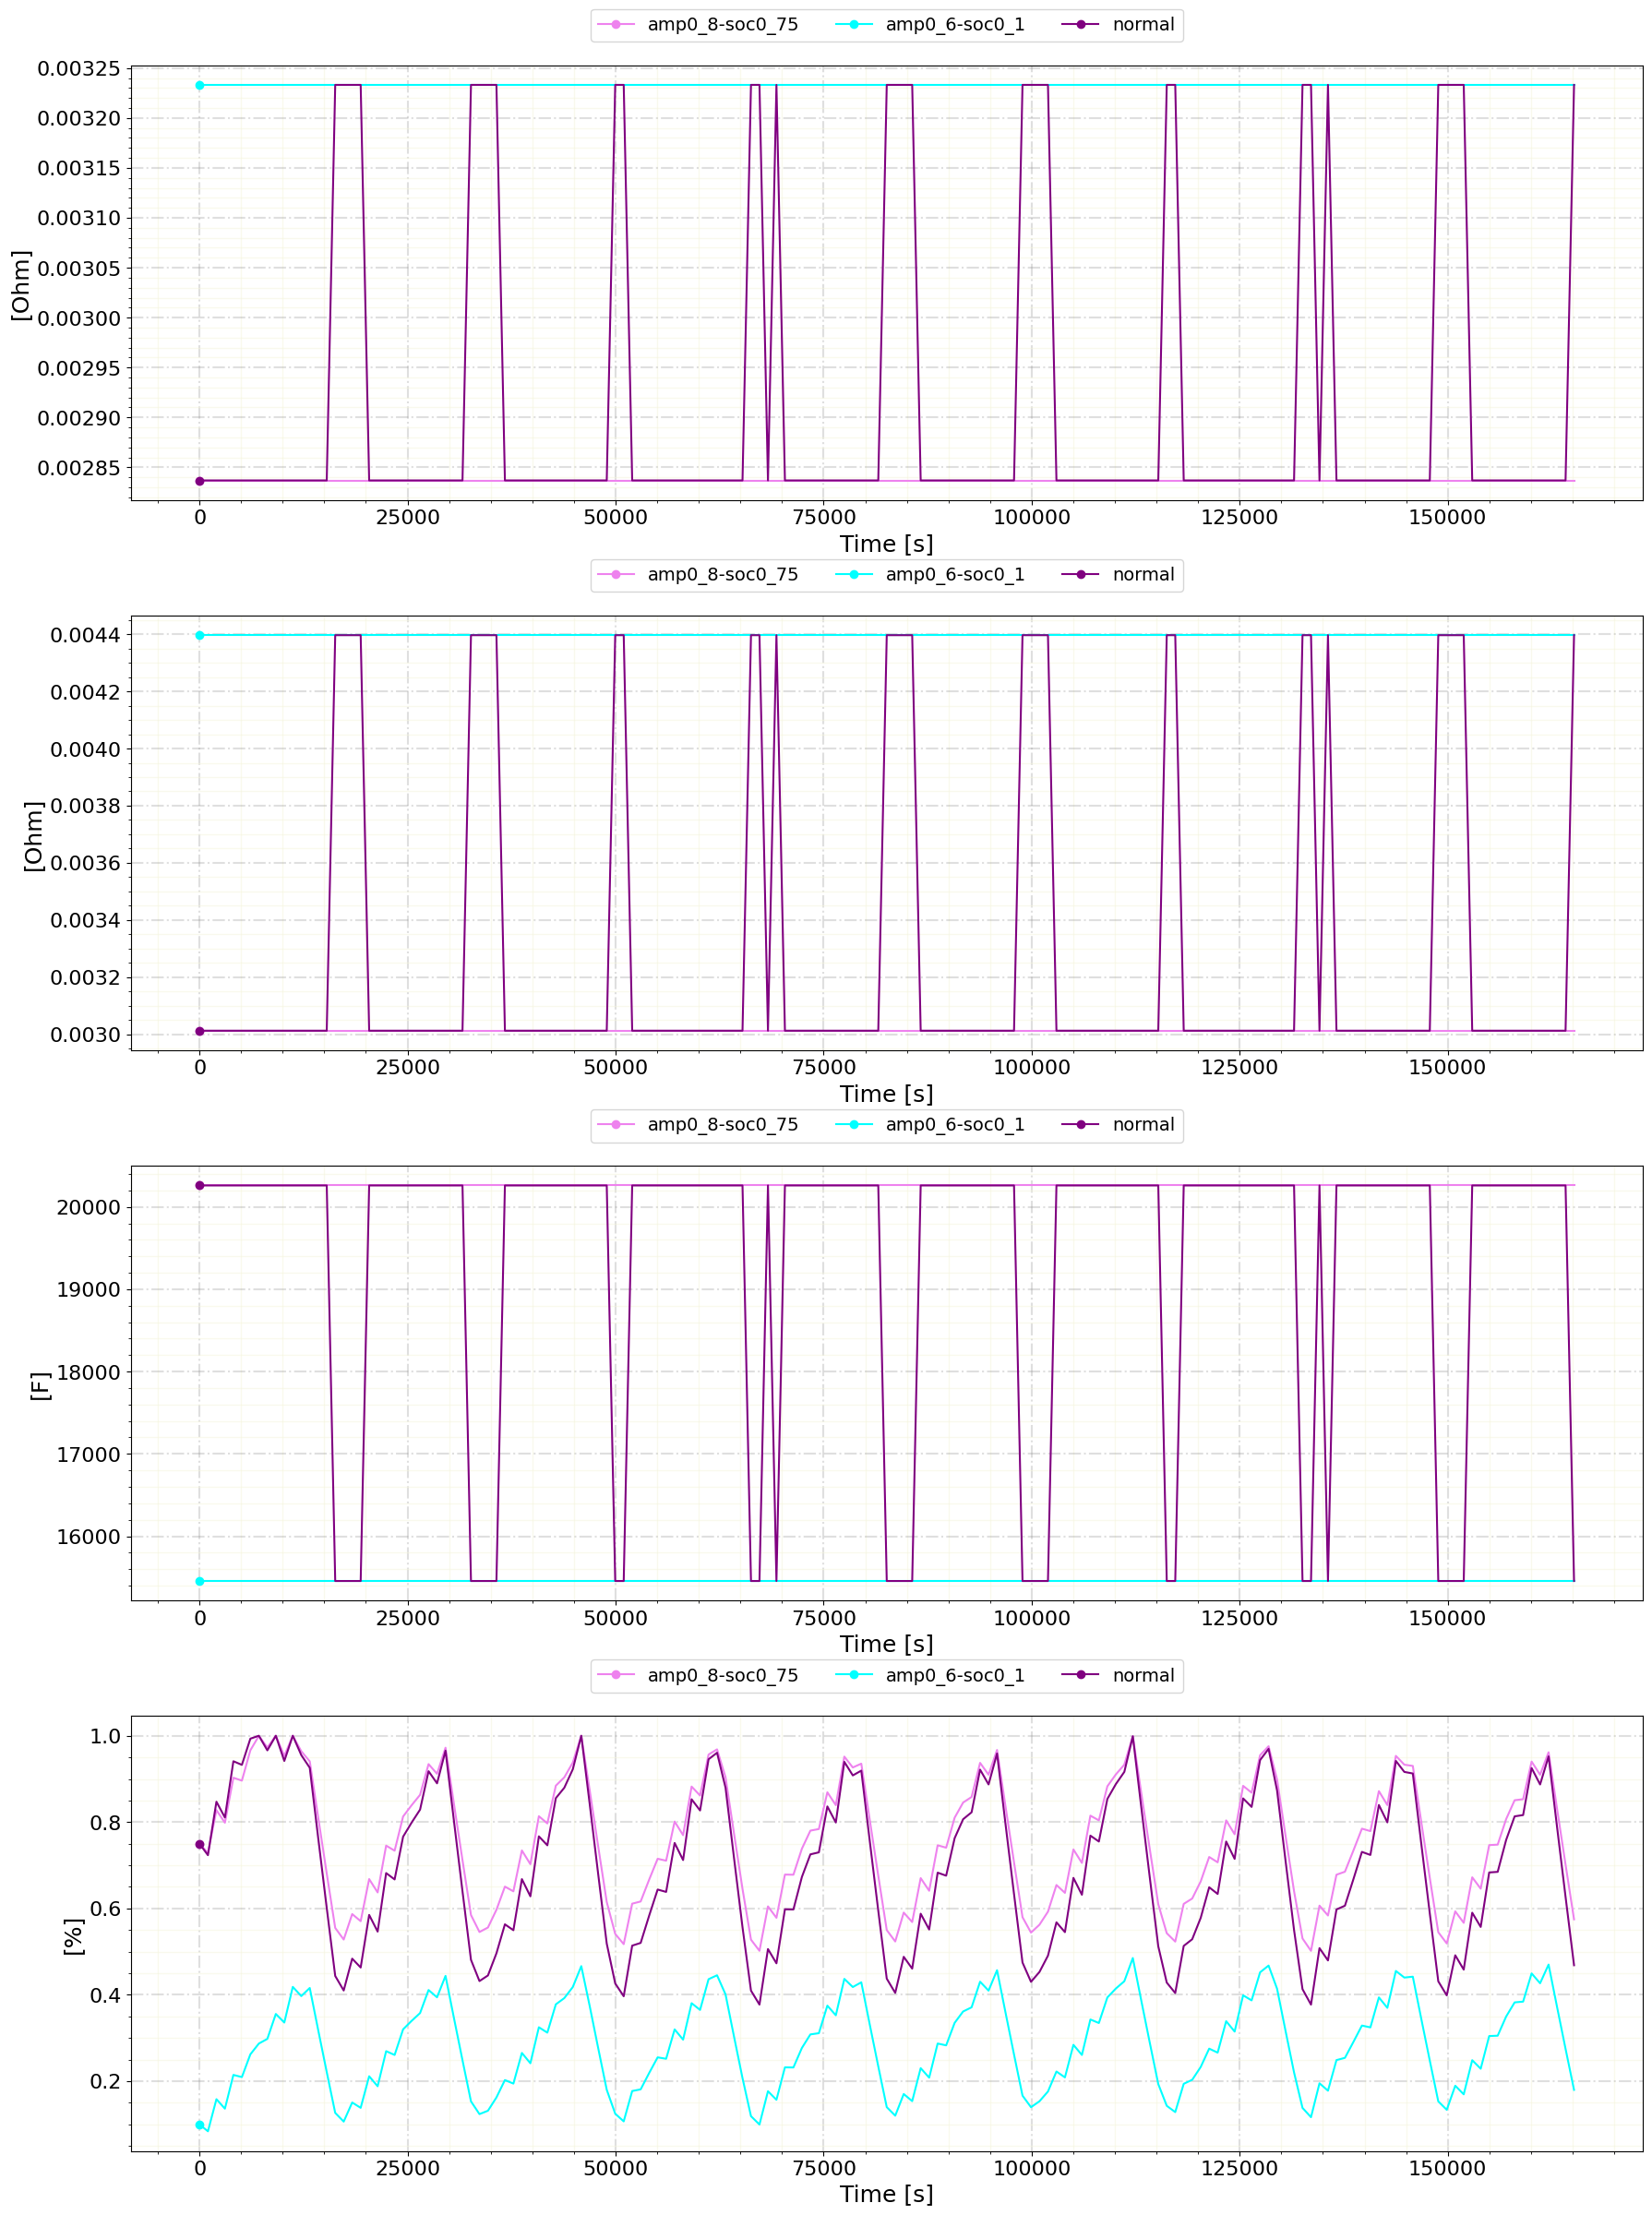

In [12]:
comparison_params['dfs'] = dfs
comparison_params['labels'] = dirs
ernesto_plotter(**comparison_params)

## Check creation of ground signals

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [259]:
folder = "../../data/output/driven/ground_for_regions/"

In [260]:
dirs = os.listdir(folder)

In [261]:
dfs = []
dfs_ground = []

In [262]:
for d in dirs:
    path = folder + d + '/' + (os.listdir(folder + d))[0] + '/'

    # Union of ground dataframes
    ground_datasets = [f for f in os.listdir(path) if f.startswith('ground')]
    ground_datasets = sorted(ground_datasets)
    df_ground = pd.concat((pd.read_csv(path + f) for f in sorted(ground_datasets)), ignore_index=True)
    dfs_ground.append(df_ground)

    # Union of simulation dataframes
    sim_datasets = [f for f in os.listdir(path) if f.startswith('dataset')]
    sim_datasets = sorted(sim_datasets)
    df_sim = pd.concat((pd.read_csv(path + f) for f in sorted(sim_datasets)), ignore_index=True)
    dfs.append(df_sim)

In [269]:
comparison_params = {
    'dfs': [], 
    'variables': ['voltage', 'temperature', 'soc', 'current'], 
    'x_axes': ['time'] * 5,
    'labels': [],
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[V]', '[K]', '[%]', '[A]'],
    'markers': ['o'] * 17,
    'line_styles': ['-'] * 17,
    'title': 'Current',
    'save_fig': False,
    'sampling_rate': 1,
    'colors': [],
    'plot_type': 'line',
    'dest': '', 
    'fig_name': '20C',
    'pic_format': 'png',
    'figsize': (18, 6),
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'legend_loc': 'upper center',
    'legend_bbox': (0.5, 1.15),
    'legend_ncol': 8
}

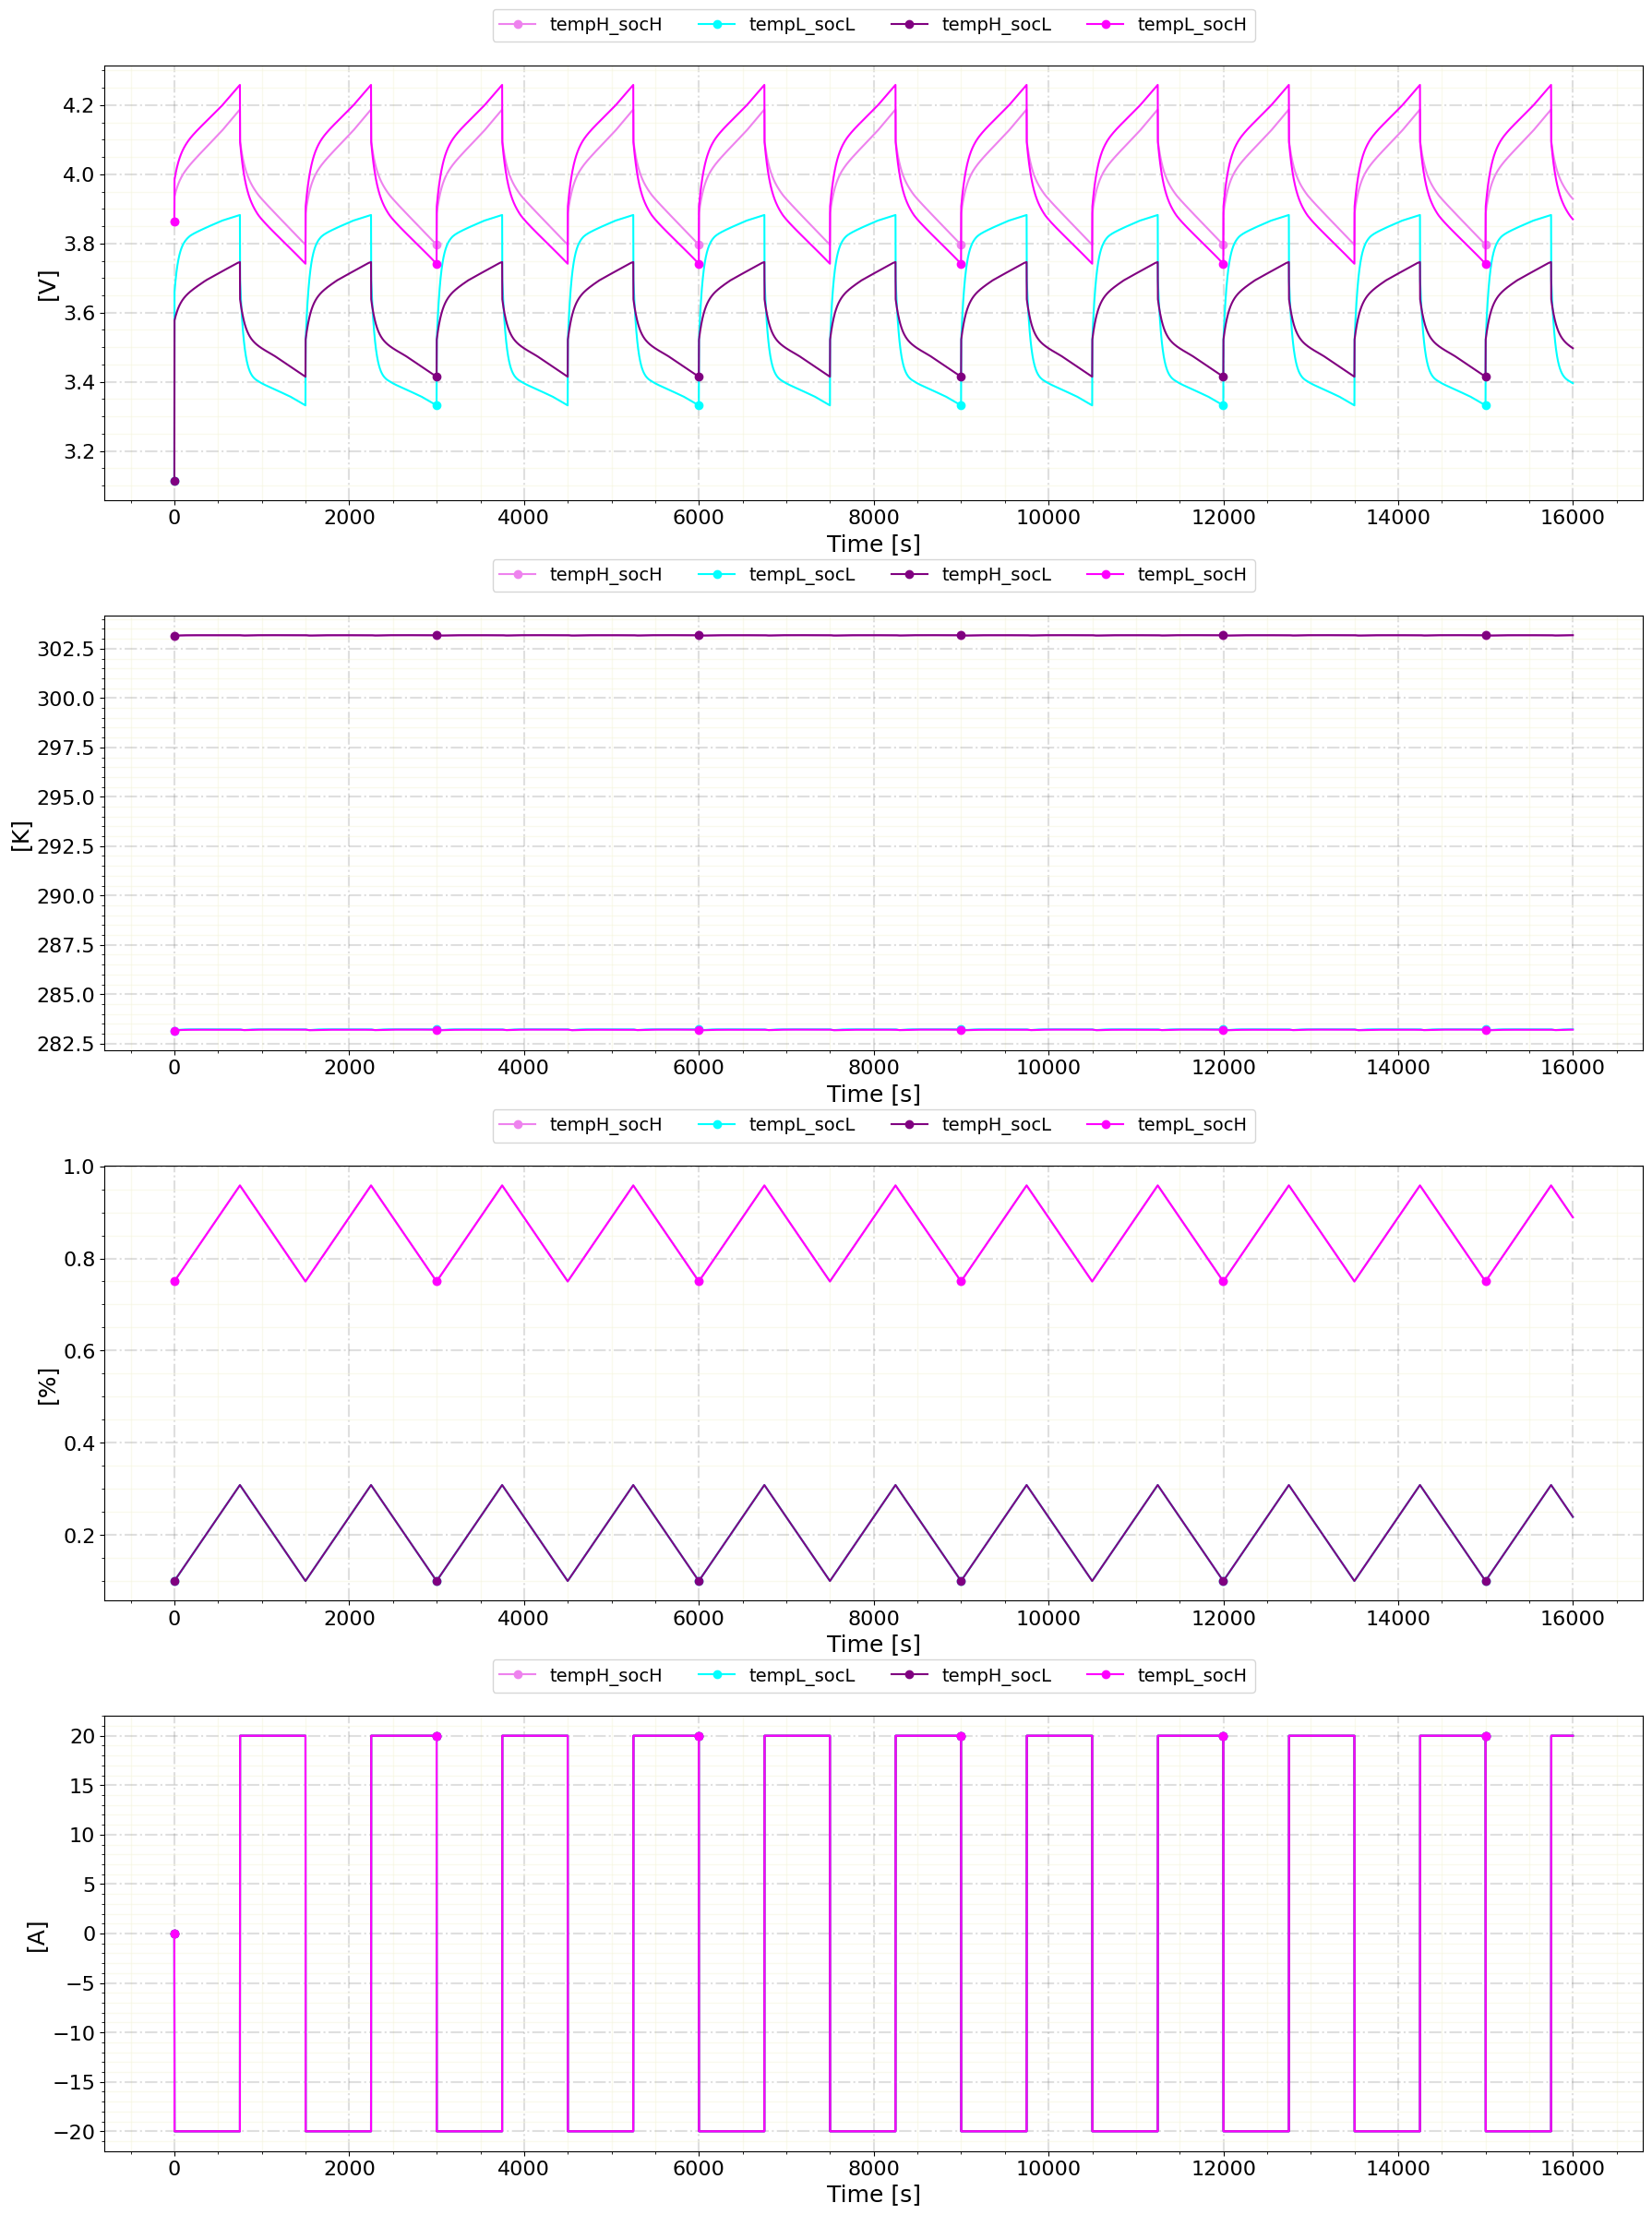

In [270]:
comparison_params['dfs'] = [df[:16000] for df in dfs]
comparison_params['labels'] = dirs
ernesto_plotter(**comparison_params)

In [271]:
comparison_params = {
    'dfs': [], 
    'variables': ['r0', 'r1', 'c'], 
    'x_axes': ['time'] * 5,
    'labels': [],
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[Ohm]', '[Ohm]', '[F]'],
    'markers': ['o'] * 17,
    'line_styles': ['-'] * 17,
    'title': 'Current',
    'save_fig': False,
    'sampling_rate': 1,
    'colors': [],
    'plot_type': 'line',
    'dest': '', 
    'fig_name': '20C',
    'pic_format': 'png',
    'figsize': (18, 6),
    'tick_font_size': 16,
    'label_font_size': 18,
    'legend_font_size': 14,
    'legend_loc': 'upper center',
    'legend_bbox': (0.5, 1.15),
    'legend_ncol': 8
}

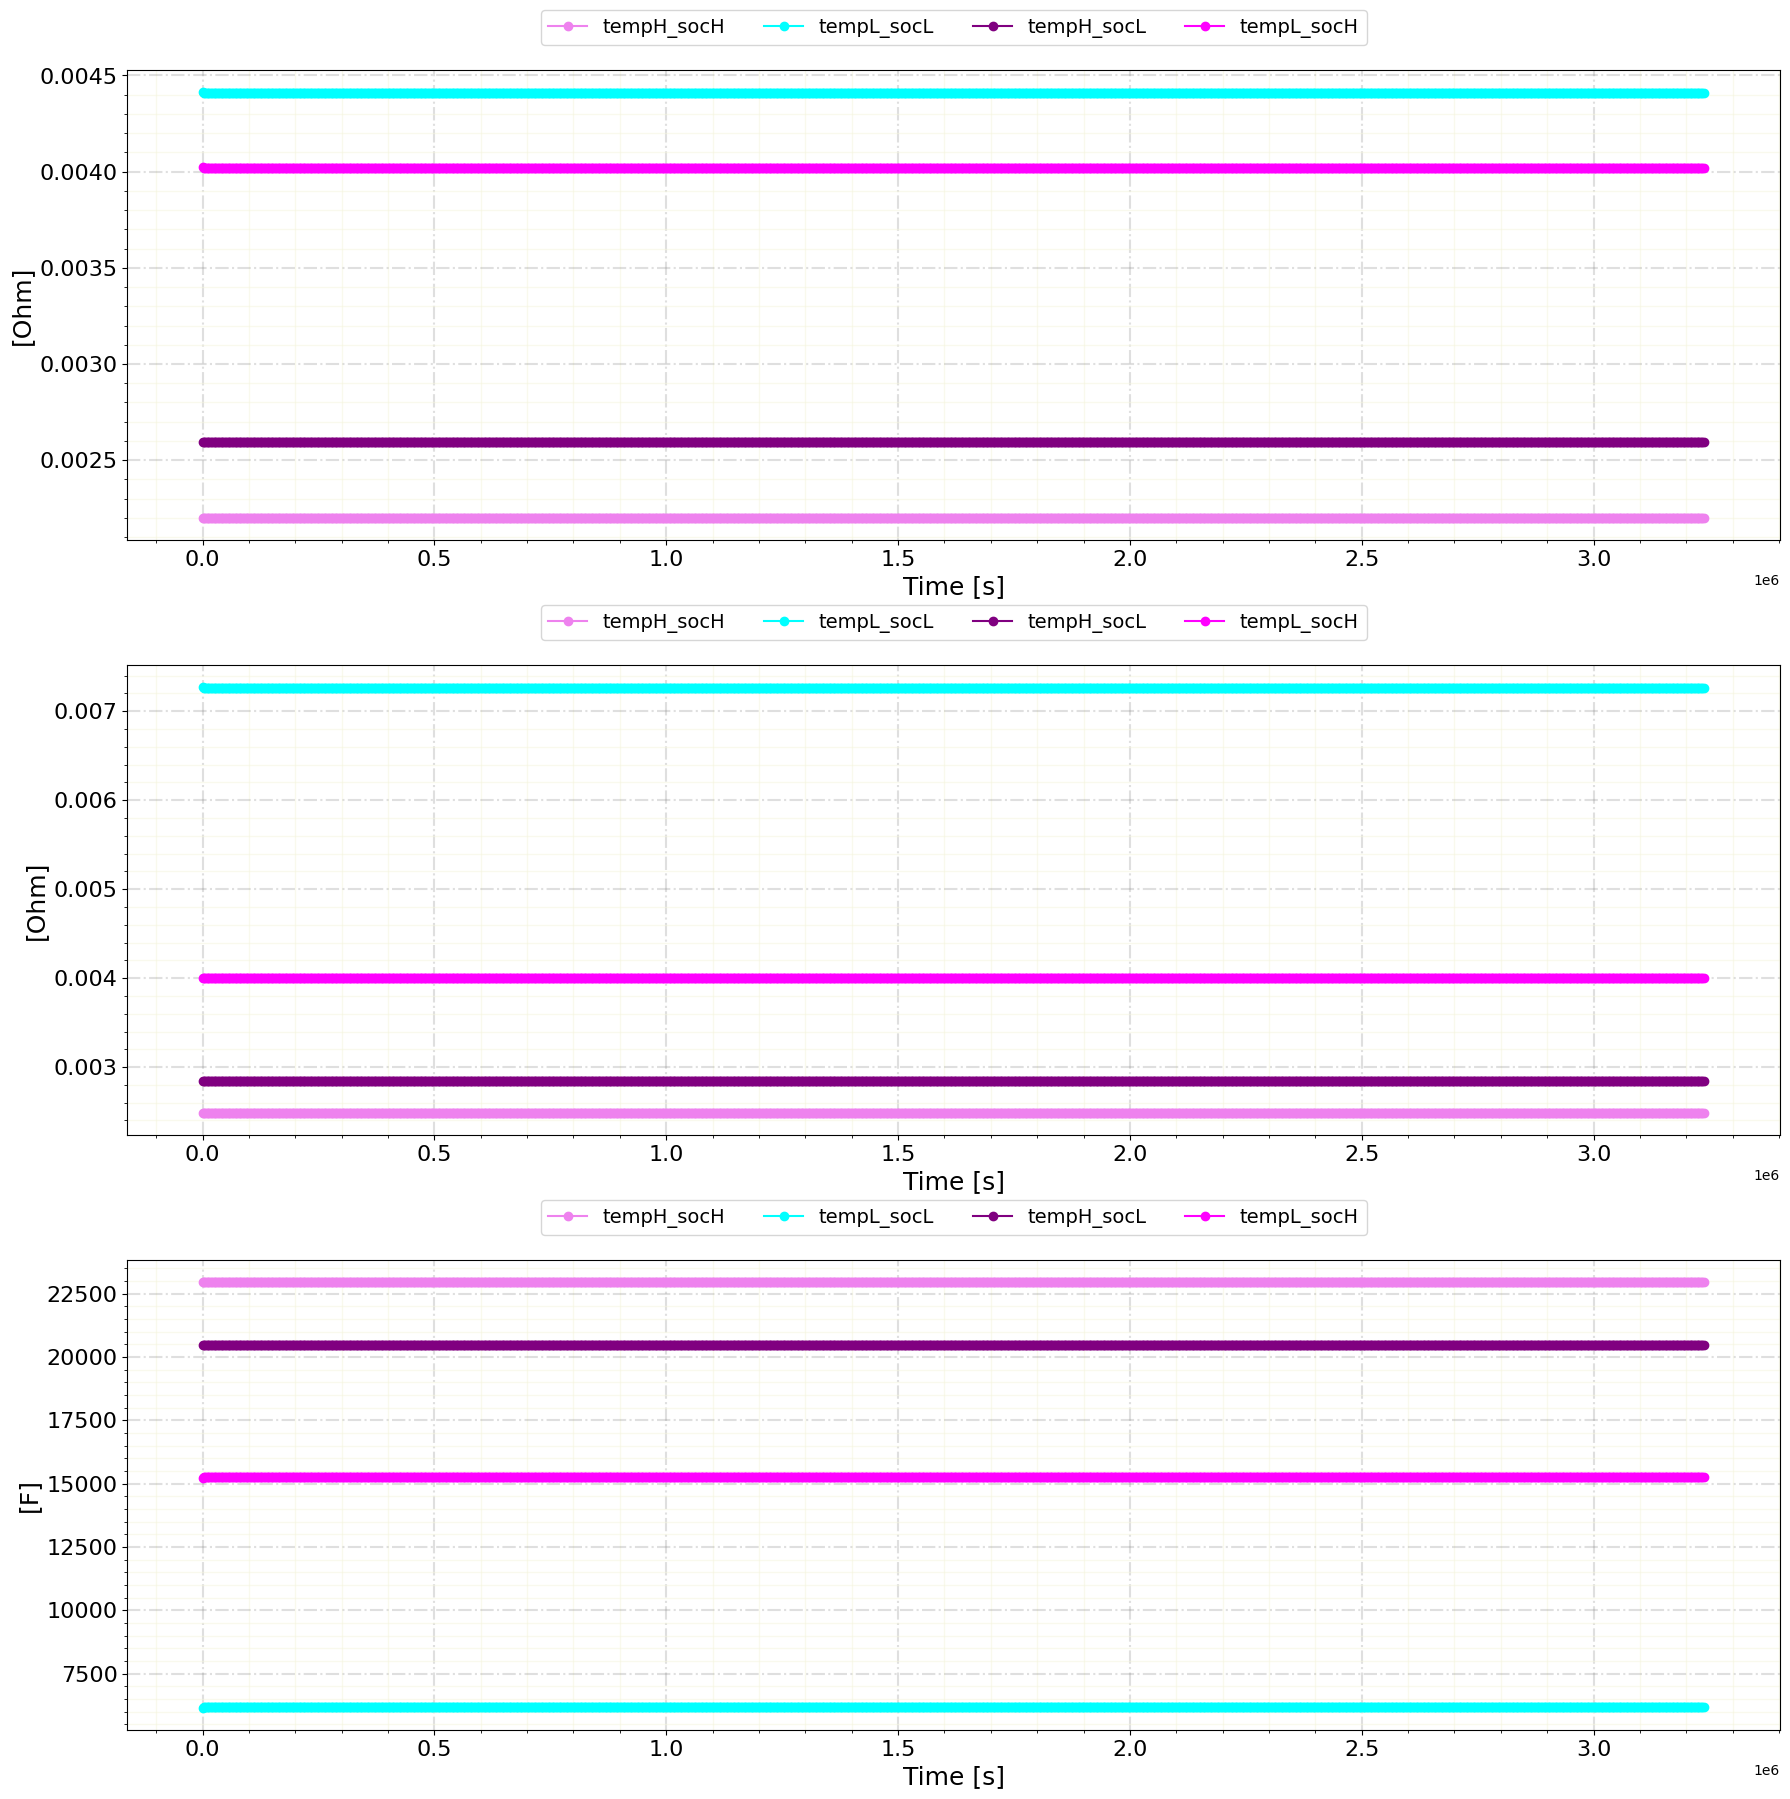

In [266]:
comparison_params['dfs'] = dfs
comparison_params['labels'] = dirs
ernesto_plotter(**comparison_params)

In [275]:
dfs_ground[0]

current     time
0           20.0        0
1           20.0        1
2           20.0        2
3           20.0        3
4           20.0        4
...          ...      ...
3239975    -20.0  3239975
3239976    -20.0  3239976
3239977    -20.0  3239977
3239978    -20.0  3239978
3239979    -20.0  3239979

[3239980 rows x 2 columns]